# STATISTICS ANALYSIS- (Z-TEST T-TEST)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [4]:
df = pd.read_csv("heart_cleaned_data.csv")

In [6]:
df

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Sugar > 120 mg/dl,Resting Electrocardiographic,Maximum Heart Rate,Exercise Induced Angina,ST Depression,Slope of Peak Exercise ST Segment,Number of Major Vessels,Thalassemia,Disease Condition
0,69,Male,Typical Angina,160,234,1,2,131,0,0.1,Flat,1,normal,No Disease
1,69,Female,Typical Angina,140,239,0,0,151,0,1.8,Upsloping,2,normal,No Disease
2,66,Female,Typical Angina,150,226,0,0,114,0,2.6,Downsloping,0,normal,No Disease
3,65,Male,Typical Angina,138,282,1,2,174,0,1.4,Flat,1,normal,Disease
4,64,Male,Typical Angina,110,211,0,2,144,1,1.8,Flat,0,normal,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,Male,Asymptomatic,152,223,0,0,181,0,0.0,Upsloping,0,Reversable Defect,Disease
293,39,Male,Asymptomatic,118,219,0,0,140,0,1.2,Flat,0,Reversable Defect,Disease
294,35,Male,Asymptomatic,120,198,0,0,130,1,1.6,Flat,0,Reversable Defect,Disease
295,35,Female,Asymptomatic,138,183,0,0,182,0,1.4,Upsloping,0,normal,No Disease


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                297 non-null    int64  
 1   Sex                                297 non-null    object 
 2   Chest Pain Type                    297 non-null    object 
 3   Resting Blood Pressure             297 non-null    int64  
 4   Serum Cholestoral                  297 non-null    int64  
 5   Fasting Blood Sugar > 120 mg/dl    297 non-null    int64  
 6   Resting Electrocardiographic       297 non-null    int64  
 7   Maximum Heart Rate                 297 non-null    int64  
 8   Exercise Induced Angina            297 non-null    int64  
 9   ST Depression                      297 non-null    float64
 10  Slope of Peak Exercise ST Segment  297 non-null    object 
 11  Number of Major Vessels            297 non-null    int64  

In [18]:
df.describe()

,Age,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Sugar > 120 mg/dl,Resting Electrocardiographic,Maximum Heart Rate,Exercise Induced Angina,ST Depression,Number of Major Vessels
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.676768
std,9.049736,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.938965
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [24]:
#Q1: One-Sample Z-Test Result (Serum Cholestoral)

# Extract the sample data for Serum Cholestoral
cholesterol = df["Serum Cholestoral"]

# Q1: One-sample Z-test
# H0: μ = 240
# H1: μ ≠ 240
pop_mean = 240
sample_mean = cholesterol.mean()
sample_std = cholesterol.std(ddof=0)  # assuming population std known
n = len(cholesterol)

# Standard Error
se = sample_std / np.sqrt(n)

# Z-statistic
z_stat = (sample_mean - pop_mean) / se

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

z_stat, p_value


(2.4401960918689434, 0.014679291367170944)

# Interpretation (α = 0.05):
### Since p = 0.0147 < 0.05, we reject the null hypothesis.

### Conclusion: There is significant evidence that the average serum cholestoral in this sample is different from 240 mg/dL.

In [29]:
# Q2: One-Sample T-Test Result (Resting Blood Pressure)
from scipy.stats import ttest_1samp

# Extract the sample data for Serum Cholestoral
bp = df["Resting Blood Pressure"]

# Q2: One-sample T-test
# H0: μ ≤ 125
# H1: μ > 125 (right-tailed)

# Perform one-sample t-test
t_stat, p_val_two_tailed = ttest_1samp(bp, popmean=125)

# Convert to one-tailed p-value for μ > 125
if t_stat > 0:
    p_val_one_tailed = p_val_two_tailed / 2
else:
    p_val_one_tailed = 1 - (p_val_two_tailed / 2)

t_stat, p_val_one_tailed

(6.494213675054308, 1.760024784116307e-10)

## Interpretation (α = 0.05):
Since p < 0.05, we reject the null hypothesis.
### Conclusion: 
The average resting blood pressure is significantly higher than 125 mmHg in the sample.

In [33]:
#Q3: Two-Sample T-Test Result (Maximum Heart Rate by Disease Condition)
from scipy.stats import ttest_ind
# Split data based on disease condition
group1 = df[df["Disease Condition"] == "Disease"]["Maximum Heart Rate"]
group2 = df[df["Disease Condition"] == "No Disease"]["Maximum Heart Rate"]

# Perform independent two-sample t-test (Welch's t-test)
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

t_stat, p_val


(-7.928642817035473, 6.107938033603319e-14)

### Interpretation (α = 0.05):
Since p < 0.05, we reject the null hypothesis.

### Conclusion: 
There is a statistically significant difference in maximum heart rate between people with and without heart disease.

In [36]:
# Q4: Proportion Z-Test for Fasting Blood Sugar > 120 mg/dl between Disease and No Disease groups
from statsmodels.stats.proportion import proportions_ztest
disease_group = df[df["Disease Condition"] == "Disease"]["Fasting Blood Sugar > 120 mg/dl"]
no_disease_group = df[df["Disease Condition"] == "No Disease"]["Fasting Blood Sugar > 120 mg/dl"]

# Count successes and total observations
successes = [disease_group.sum(), no_disease_group.sum()]
n_obs = [len(disease_group), len(no_disease_group)]

# Perform two-proportion Z-test
z_stat, p_val = proportions_ztest(successes, n_obs)

z_stat, p_val


(0.054576156029230265, 0.9564761351720441)

### Interpretation (α = 0.05):
Since p = 0.956 > 0.05, we fail to reject the null hypothesis.

### Conclusion: 
There is no significant difference in the proportion of patients with high fasting blood sugar between those with and without heart disease.

In [39]:
# Q5: One-Way ANOVA for ST Depression across Chest Pain Types
from scipy.stats import f_oneway
# Group ST Depression by Chest Pain Type
groups = df.groupby("Chest Pain Type")["ST Depression"].apply(list)

# Perform one-way ANOVA
anova_result = f_oneway(*groups)

anova_result.statistic, anova_result.pvalue

(13.520007051672637, 2.7563359974428144e-08)

### Interpretation (α = 0.05):
Since p < 0.05, we reject the null hypothesis.

### Conclusion: 
There is a significant difference in average ST Depression among different chest pain types.

In [42]:
#Q6: Chi-Square Test — Is Chest Pain Type related to Disease Condition?
import scipy.stats as stats
# Create a contingency table
contingency_table = pd.crosstab(df['Chest Pain Type'], df['Disease Condition'])
print(contingency_table)
# Perform Chi-Square Test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"p-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")

Disease Condition  Disease  No Disease
Chest Pain Type                       
Asymptomatic           103          39
Atypical Angina          9          40
Non-anginal Pain        18          65
Typical Angina           7          16
Chi-Square Statistic: 77.28
p-value: 0.0000
Degrees of Freedom: 3


### Result
H₀ (Null Hypothesis): Chest Pain Type and Disease Condition are independent.

H₁ (Alt Hypothesis): Chest Pain Type and Disease Condition are not independent (i.e., related).

Use significance level α = 0.05

### If p-value < 0.05:
Reject H₀ → There's a significant relationship.

### If p-value ≥ 0.05:
Fail to reject H₀ → No significant relationship found.
### Since p < 0.05, chest pain type is significantly related to the presence of heart disease.

In [48]:
#Q7: Simulated Paired T-Test (Maximum Heart Rate Before vs After Hypothetical Treatment)
from scipy.stats import ttest_rel
# Simulate 'after treatment' heart rate by reducing each by a small random amount
np.random.seed(42)
df['Heart Rate After'] = df['Maximum Heart Rate'] - np.random.normal(loc=5, scale=2, size=len(df))

# Perform Paired T-Test
t_stat, p_val = ttest_rel(df['Maximum Heart Rate'], df['Heart Rate After'])

# Display results
print(f"Paired T-Test Statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("There is a significant difference in heart rate before and after treatment.")
else:
    print("No significant difference found in heart rate before and after treatment.")


Paired T-Test Statistic: 43.44
p-value: 0.0000
There is a significant difference in heart rate before and after treatment.


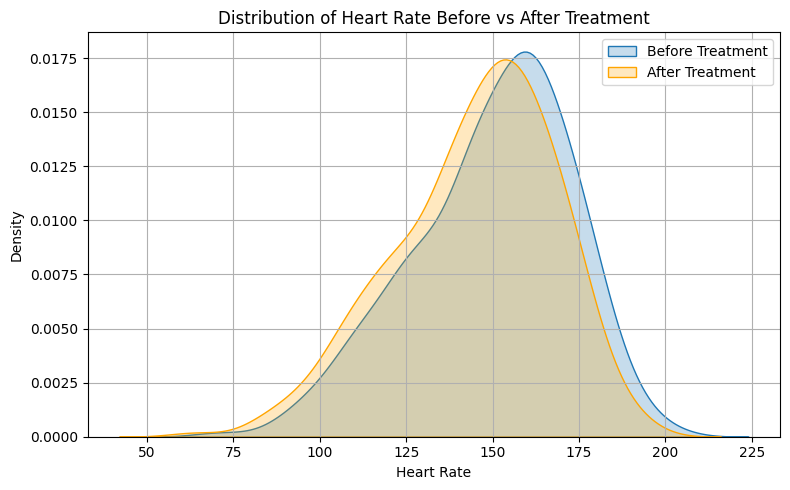

In [52]:
#Lets vizualize it.
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(df['Maximum Heart Rate'], label='Before Treatment', fill=True)
sns.kdeplot(df['Heart Rate After'], label='After Treatment', fill=True, color='orange')
plt.title('Distribution of Heart Rate Before vs After Treatment')
plt.xlabel('Heart Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Hypotheses
H₀₁ (Main Effect A): Mean ST Depression is equal across all chest pain types

H₀₂ (Main Effect B): Mean ST Depression is equal across disease conditions

H₀₃ (Interaction): There's no interaction between chest pain type and disease condition

In [60]:
# Let’s perform a Two-Way ANOVA to test: Does ST Depression vary based on Chest Pain Type and Disease Condition?
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

# Fit the Two-Way ANOVA model
#model = ols('Q("ST Depression") ~ C(Q("Chest Pain Type")) + C(Q("Disease Condition")) + C(Q("Chest Pain Type")):C(Q("Disease Condition"))', data=df).fit()

# Perform ANOVA
#anova_table = sm.stats.anova_lm(model, typ=2)
#print(anova_table)

### p < 0.05: Significant main or interaction effect

### p ≥ 0.05: No significant effect